In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Time Management in Ramadan.csv")

Saving Time Management in Ramadan.csv to Time Management in Ramadan.csv


In [3]:
df.head()

,Timestamp,What is your academic year?,What is your major?,What is your primary mode of transport to university?,How many hours do you typically sleep during Ramadan?,How many hours do you spend studying daily during Ramadan?,Do you attend Taraweeh prayers during Ramadan?,What do you usually do after Taraweeh prayers? (Multiple choices allowed),How do you manage your university workload during Ramadan? (Multiple choices allowed),What is the biggest challenge you face in managing your time during Ramadan? (Multiple choices allowed),When do you feel most productive during Ramadan?
0,3/14/2025 21:35,Sophomore,Computer Science,"Public transport (bus, train, metro, etc.)",4–6 hours,1–3 hours,"Yes, every night",Study or complete university work;Use social m...,I study late at night after Taraweeh;I take br...,Balancing studies and religious commitments;Fe...,Late night (after Taraweeh)
1,3/13/2025 0:14,Sophomore,Computer Science,Car (personal or family),6–8 hours,3–5 hours,"Yes, but only sometimes",Spend time with family/friends;Sleep early to ...,I stick to a strict study schedule;I study ear...,Feeling tired and low on energy;Difficulty con...,Early morning (after Suhoor)
2,3/19/2025 0:16,Junior,Engineering,"Ride-sharing (Uber, Bolt, Careem, etc.)",Less than 4 hours,1–3 hours,"No, I don’t attend Taraweeh",Study or complete university work;Read Quran o...,I study early in the morning before Suhoor,Balancing studies and religious commitments;Di...,Evening (after Iftar)
3,3/17/2025 15:45,Sophomore,Computer Science,"Public transport (bus, train, metro, etc.)",4–6 hours,3–5 hours,"Yes, every night",Study or complete university work;Go out (e.g....,I study late at night after Taraweeh;I take br...,Disrupted sleep schedule;Less time for social ...,Late night (after Taraweeh)
4,3/16/2025 8:13,Senior,Business Informatics,"Ride-sharing (Uber, Bolt, Careem, etc.)",More than 8 hours,1–3 hours,"Yes, but only sometimes",Spend time with family/friends;Sleep early to ...,I only study when I feel I have energy;I take ...,Feeling tired and low on energy;Less time for ...,I don't have a fixed productive time


In [4]:
df.isnull().sum()

,0
Timestamp,0
What is your academic year?,0
What is your major?,0
What is your primary mode of transport to university?,0
How many hours do you typically sleep during Ramadan?,0
How many hours do you spend studying daily during Ramadan?,0
Do you attend Taraweeh prayers during Ramadan?,0
What do you usually do after Taraweeh prayers? (Multiple choices allowed),0
How do you manage your university workload during Ramadan? (Multiple choices allowed),0
What is the biggest challenge you face in managing your time during Ramadan? (Multiple choices allowed),0


In [5]:
df.isna().any()

,0
Timestamp,False
What is your academic year?,False
What is your major?,False
What is your primary mode of transport to university?,False
How many hours do you typically sleep during Ramadan?,False
How many hours do you spend studying daily during Ramadan?,False
Do you attend Taraweeh prayers during Ramadan?,False
What do you usually do after Taraweeh prayers? (Multiple choices allowed),False
How do you manage your university workload during Ramadan? (Multiple choices allowed),False
What is the biggest challenge you face in managing your time during Ramadan? (Multiple choices allowed),False


In [6]:
df.shape

(41, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 11 columns):
 #   Column                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                   --------------  ----- 
 0   Timestamp                                                                                                41 non-null     object
 1   What is your academic year?                                                                              41 non-null     object
 2   What is your major?                                                                                      41 non-null     object
 3   What is your primary mode of transport to university?                                                    41 non-null     object
 4   How many hours do you typically sleep during Ramadan?                                         

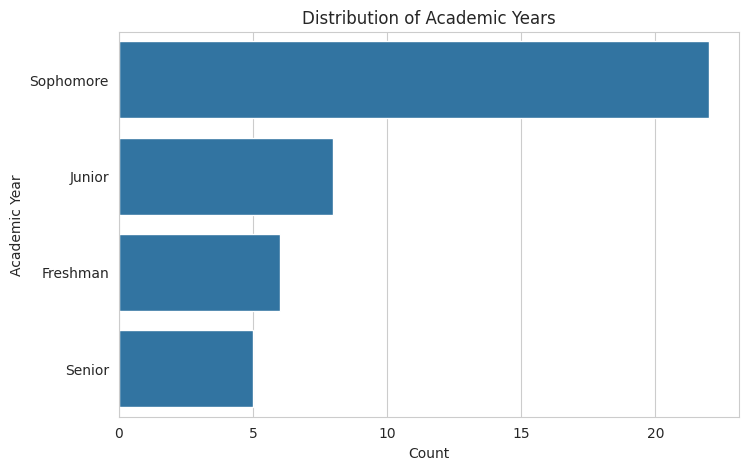

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(y=df["What is your academic year?"], order=df["What is your academic year?"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Academic Year")
plt.title("Distribution of Academic Years")
plt.show()

<Axes: ylabel='count'>

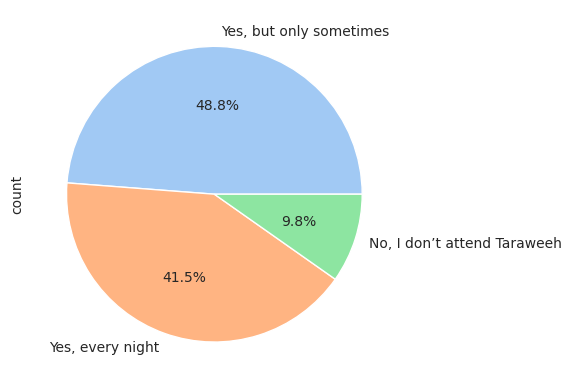

In [11]:
df.columns = df.columns.str.strip()
df["Do you attend Taraweeh prayers during Ramadan?"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))

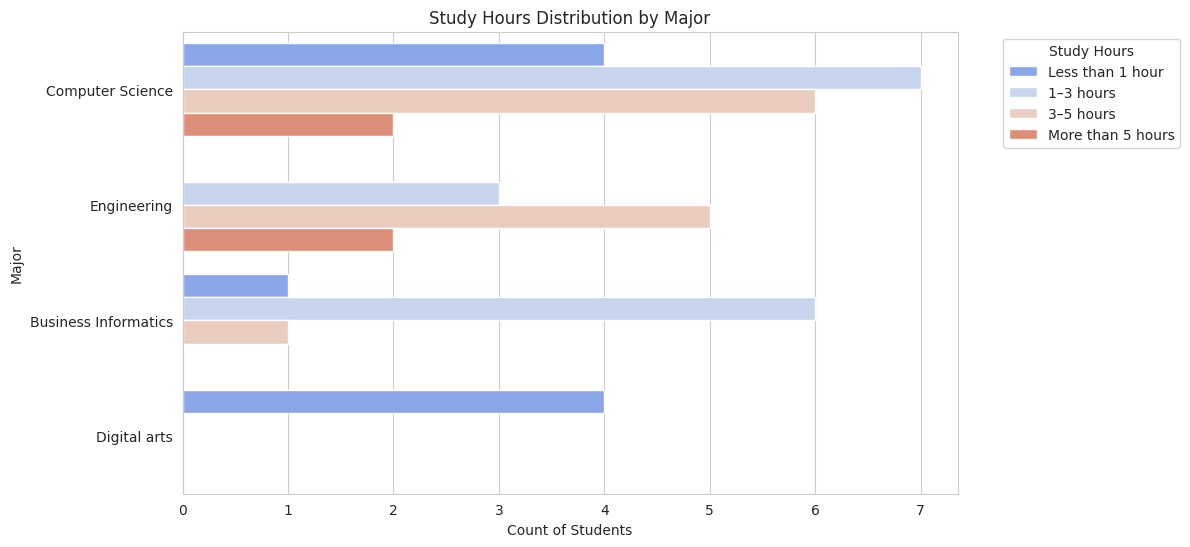

In [12]:
study_hours_order = ["Less than 1 hour", "1–3 hours", "3–5 hours", "More than 5 hours"]
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="What is your major?", hue="How many hours do you spend studying daily during Ramadan?", order=df["What is your major?"].value_counts().index, hue_order=study_hours_order, palette="coolwarm")
plt.xlabel("Count of Students")
plt.ylabel("Major")
plt.title("Study Hours Distribution by Major")
plt.legend(title="Study Hours", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-13-994bc3f8bcca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="What is your major?", y="How many hours do you typically sleep during Ramadan?", palette="coolwarm")


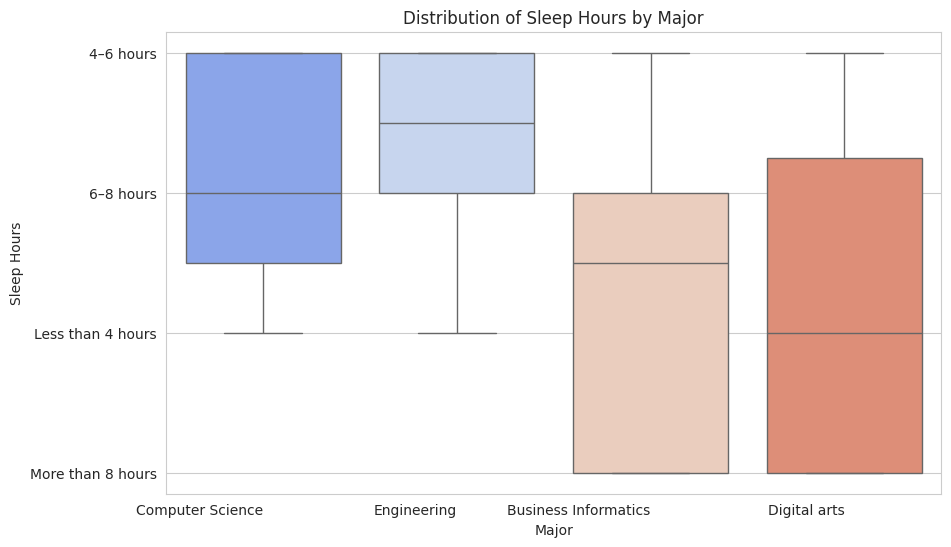

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="What is your major?", y="How many hours do you typically sleep during Ramadan?", palette="coolwarm")
plt.xlabel("Major")
plt.ylabel("Sleep Hours")
plt.title("Distribution of Sleep Hours by Major")
plt.xticks(ha="right")
plt.show()

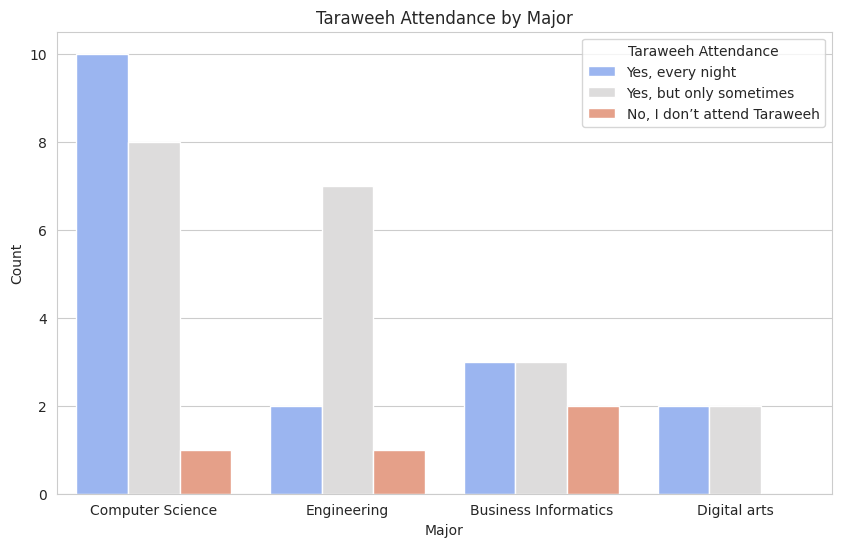

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="What is your major?", hue="Do you attend Taraweeh prayers during Ramadan?", palette="coolwarm")
plt.xlabel("Major")
plt.ylabel("Count")
plt.title("Taraweeh Attendance by Major")
plt.xticks()
plt.legend(title="Taraweeh Attendance")
plt.show()